In [35]:
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import statsmodels.graphics.api as abline_plot
import numpy as np

In [133]:
df = ps.read_csv("Mall_Customers.csv")
df.tail(15)

,CustomerID,Genre,Age,Annual_Income,Spending_Score
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16


In [37]:
print(df.shape)
df.dtypes

(200, 5)


CustomerID         int64
Genre             object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [92]:
df = df[df['Age'].notna() & df['Annual_Income'].notna()]

###Распределение доходов и возраста относительно рейтинга

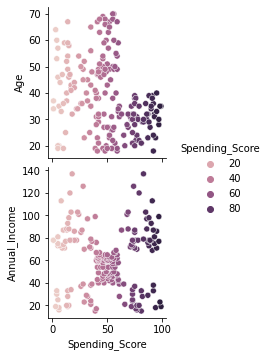

In [93]:
sns.pairplot(
    df,
    x_vars = ['Spending_Score'],
    y_vars = ['Age', 'Annual_Income'],
    hue='Spending_Score'
)

Text(0.5, 1.0, 'Количество мужчин и женщин')

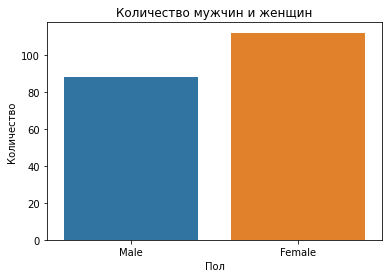

In [95]:
sns.countplot(x='Genre', data=df)
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.title('Количество мужчин и женщин')

###### Дисперсия возраста 

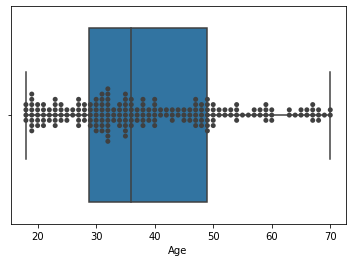

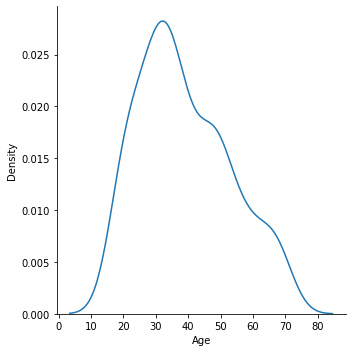

In [97]:
sns.boxplot(x = df['Age'])
sns.swarmplot(x = df['Age'], color = '.25')
sns.displot(df, x = 'Age', kind="kde")

###### Дисперсия уровня доходв

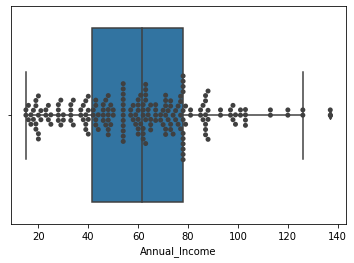

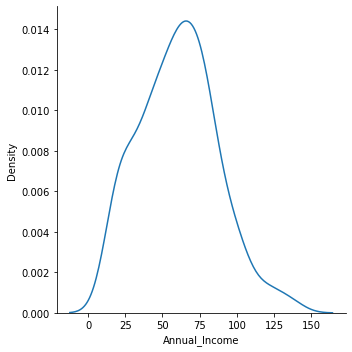

In [98]:
sns.boxplot(x = df['Annual_Income'])
sns.swarmplot(x = df['Annual_Income'], color = '.25')
sns.displot(df, x = 'Annual_Income', kind="kde")

### Форматирование данных для GLM

In [136]:
#sns.countplot(x='Age', data=df)

def create_new_category(old_data, new_claster_data: list, name_column: str):
    new_df = old_data
    for i in new_claster_data:
        n_filter_one = new_df[name_column] > i[0]
        n_filter_two = new_df[name_column] <= i[1]
        
        new_df.loc[n_filter_one & n_filter_two , name_column] = i[1]
    
    return new_df

df_GLM =  df

df_GLM = create_new_category(df_GLM, [[0, 15],[15 , 30], [30, 50], [50, 100], [100, 140]], 'Annual_Income')
df_GLM = create_new_category(df_GLM, [[0, 18],[18 , 25], [25, 35], [35, 50], [50, 70]], 'Age')


<AxesSubplot:xlabel='Annual_Income', ylabel='count'>

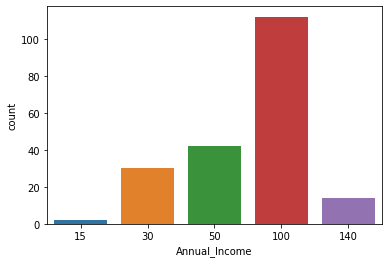

In [137]:
#количество для доходов после фильтров
sns.countplot(x='Annual_Income', data=df_GLM)

<AxesSubplot:xlabel='Age', ylabel='count'>

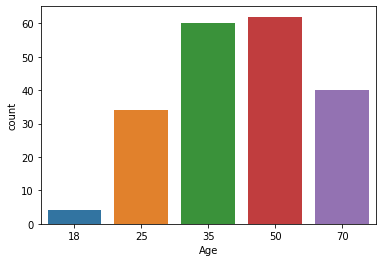

In [138]:
#количество для возраста после фильтров
sns.countplot(x='Age', data=df_GLM)

In [152]:
logist = sf.glm('Annual_Income ~ C(Age)', df_GLM, family=sm.families.Binomial()).fit()

In [153]:
logist.summary()

/home/eliss/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/eliss/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Annual_Income   No. Observations:                  200
Model:                            GLM   Df Residuals:                      195
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sun, 01 May 2022   Deviance:                   1.2979e+06
Time:                        19:09:48   Pearson chi2:                 6.73e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      5.01e+17   3.36e+07   1.49e+10      0.000    5.01e+17    5.01e+17
C(Age)[T.25] -6.358e+16   3.55e+07  -1.79e+09      0.000   -6.36e+16   -6.36e+16
C(Age)[T.35]  7.544e+16   3.47e+07   2.18e+09      0.000    7.54e+16    7.54e+16
C(Age)[T.50]  1.002e+17   3.46e+07    2.9e+09      0.000       1e+17       1e+17
C(Age)[T.70] -1.351e+16   3.52e+07  -3.84e+08      0.000   -1.35e+16   -1.35e+16
================================================================================
"""

In [155]:
yhat = logist.mu
y = df_GLM.Annual_Income


#fig, ax = plt.subplots()
#ax.scatter(yhat, )

/tmp/ipykernel_5952/3582296335.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df_GLM.iloc[:,0]/df_GLM.sum(1)
